In [23]:
import gym
import numpy as np
import matplotlib.pyplot as plt

In [24]:
env = gym.make("MountainCar-v0")



In [25]:
print(env.observation_space.high)
print(env.observation_space.low)
print(env.action_space.n)

[0.6  0.07]
[-1.2  -0.07]
3


In [26]:
LEARNING_RATE = 0.1
DISCOUNT = 0.95
EPISODES = 25000
SHOW_EVERY = 1000


In [27]:
DISCRETE_OS_SIZE = [20] * len(env.observation_space.high)
print(DISCRETE_OS_SIZE)
discrete_os_win_size = (env.observation_space.high - env.observation_space.low)/DISCRETE_OS_SIZE
print(discrete_os_win_size)

[20, 20]
[0.09  0.007]


In [28]:
epsilon = 0.5
START_EPSILON_DECAYING = 1
END_EPSILON_DECAYING  = EPISODES // 2

epsilon_decay_value = epsilon/(END_EPSILON_DECAYING - START_EPSILON_DECAYING)

In [29]:
q_table = np.random.uniform(low= -2 , high =0, size =(DISCRETE_OS_SIZE + [env.action_space.n]))
print(q_table.shape)
print(q_table)

(20, 20, 3)
[[[-1.52156934 -0.5884265  -1.88560025]
  [-1.94202775 -0.32150281 -1.00247605]
  [-1.81209628 -1.92353391 -0.39544108]
  ...
  [-1.66027934 -0.01452806 -0.12827985]
  [-1.54313859 -0.03806872 -1.73430962]
  [-0.55245449 -0.5151735  -0.96504035]]

 [[-1.74330403 -0.63101845 -1.18284163]
  [-0.68348937 -0.0353055  -0.25085609]
  [-0.13701231 -1.17913507 -1.28721406]
  ...
  [-0.91670874 -1.76241417 -0.72374344]
  [-0.02228111 -0.71812391 -1.16717355]
  [-0.48731254 -0.09315477 -0.67130011]]

 [[-0.66317541 -0.59232654 -1.69195244]
  [-1.68372764 -0.40202051 -1.74113148]
  [-1.76457651 -0.47273228 -1.80570632]
  ...
  [-1.28243253 -1.28724792 -0.3427905 ]
  [-0.39846636 -1.60117804 -1.95930484]
  [-1.09930704 -0.30398474 -0.38803148]]

 ...

 [[-1.29555966 -1.58121617 -0.99523119]
  [-0.08650433 -1.63585558 -0.95888242]
  [-1.76951603 -1.5312406  -0.18173484]
  ...
  [-1.22056609 -1.7935875  -1.17786528]
  [-0.52347159 -0.24745238 -0.90874231]
  [-0.36662483 -1.38505045 -0.04

In [30]:
ep_rewards = []
aggr_ep_rewards = { 'ep': [], 'avg':[], 'min':[], 'max':[]}


In [31]:
def get_discrete_state(state):
    discrete_state = (state - env.observation_space.low)/ discrete_os_win_size
    return tuple(discrete_state.astype(np.int))




In [32]:
for episode in range(EPISODES):
    episode_reward = 0
    if episode % SHOW_EVERY == 0:
        print(episode)
        render = True
    else:
        render = False
    discrete_state = get_discrete_state(env.reset())

    done  = False
    while not  done:
        if np.random.random() > epsilon:
            
            action = np.argmax(q_table[discrete_state])
        else:
            action = np.random.randint(0,env.action_space.n)
        new_state,reward,done,_ = env.step(action)
        episode_reward += reward
        new_discrete_state = get_discrete_state(new_state)
    
        if render:
            env.render()
        if not done:
            max_future_q = np.max(q_table[new_discrete_state])
            current_q = q_table[discrete_state + (action, )]
            new_q = (1-LEARNING_RATE)*current_q + LEARNING_RATE * (reward + DISCOUNT*max_future_q)
            q_table[discrete_state + (action, )] = new_q
        elif new_state[0] >= env.goal_position:
            print(f"We make on episode {episode}")
            q_table[discrete_state + (action,)] = 0

        discrete_state = new_discrete_state
    if END_EPSILON_DECAYING >= episode >= START_EPSILON_DECAYING:
        epsilon  -= epsilon_decay_value
        
    ep_rewards.append(episode_reward)
    
    if episode % 500 == 0:
        np.save(f"qtables/{episode}-qtable.npy", q_table)
    
    if not episode % SHOW_EVERY:
        average_reward = sum(ep_rewards[-SHOW_EVERY:])/len(ep_rewards[-SHOW_EVERY:])
        aggr_ep_rewards['ep'].append(episode)
        aggr_ep_rewards["avg"].append(average_reward)
        aggr_ep_rewards['min'].append(min(ep_rewards[-SHOW_EVERY:]))
        aggr_ep_rewards['max'].append(max(ep_rewards[-SHOW_EVERY:]))
        print(f"Episode: {episode} avg: {average_reward} min: {min(ep_rewards[-SHOW_EVERY:])} max: {max(ep_rewards[-SHOW_EVERY:])}")
        
            
        
env.close()    

0
Episode: 0 avg: -200.0 min: -200.0 max: -200.0
We make on episode 996
1000
Episode: 1000 avg: -199.999 min: -200.0 max: -199.0
We make on episode 1162
We make on episode 1420
We make on episode 1565
We make on episode 1672
We make on episode 1693
We make on episode 1727
We make on episode 1772
We make on episode 1778
We make on episode 1898
We make on episode 1966
2000
Episode: 2000 avg: -199.802 min: -200.0 max: -159.0
We make on episode 2032
We make on episode 2167
We make on episode 2227
We make on episode 2245
We make on episode 2247
We make on episode 2253
We make on episode 2256
We make on episode 2259
We make on episode 2275
We make on episode 2292
We make on episode 2303
We make on episode 2309
We make on episode 2315
We make on episode 2318
We make on episode 2326
We make on episode 2335
We make on episode 2339
We make on episode 2342
We make on episode 2348
We make on episode 2388
We make on episode 2395
We make on episode 2396
We make on episode 2397
We make on episode 240

We make on episode 4464
We make on episode 4465
We make on episode 4470
We make on episode 4490
We make on episode 4495
We make on episode 4498
We make on episode 4505
We make on episode 4522
We make on episode 4527
We make on episode 4529
We make on episode 4553
We make on episode 4556
We make on episode 4560
We make on episode 4562
We make on episode 4578
We make on episode 4579
We make on episode 4580
We make on episode 4581
We make on episode 4582
We make on episode 4587
We make on episode 4613
We make on episode 4614
We make on episode 4617
We make on episode 4623
We make on episode 4624
We make on episode 4625
We make on episode 4629
We make on episode 4645
We make on episode 4647
We make on episode 4649
We make on episode 4651
We make on episode 4658
We make on episode 4660
We make on episode 4664
We make on episode 4665
We make on episode 4680
We make on episode 4687
We make on episode 4688
We make on episode 4712
We make on episode 4715
We make on episode 4719
We make on episo

We make on episode 5649
We make on episode 5650
We make on episode 5651
We make on episode 5652
We make on episode 5653
We make on episode 5654
We make on episode 5676
We make on episode 5694
We make on episode 5722
We make on episode 5728
We make on episode 5733
We make on episode 5758
We make on episode 5761
We make on episode 5762
We make on episode 5763
We make on episode 5765
We make on episode 5767
We make on episode 5771
We make on episode 5775
We make on episode 5776
We make on episode 5778
We make on episode 5779
We make on episode 5781
We make on episode 5782
We make on episode 5784
We make on episode 5786
We make on episode 5787
We make on episode 5788
We make on episode 5789
We make on episode 5790
We make on episode 5791
We make on episode 5792
We make on episode 5794
We make on episode 5795
We make on episode 5797
We make on episode 5798
We make on episode 5799
We make on episode 5800
We make on episode 5801
We make on episode 5802
We make on episode 5803
We make on episo

We make on episode 6435
We make on episode 6440
We make on episode 6441
We make on episode 6443
We make on episode 6444
We make on episode 6445
We make on episode 6447
We make on episode 6448
We make on episode 6449
We make on episode 6450
We make on episode 6451
We make on episode 6459
We make on episode 6460
We make on episode 6461
We make on episode 6463
We make on episode 6465
We make on episode 6466
We make on episode 6467
We make on episode 6468
We make on episode 6469
We make on episode 6473
We make on episode 6474
We make on episode 6475
We make on episode 6477
We make on episode 6478
We make on episode 6479
We make on episode 6480
We make on episode 6482
We make on episode 6487
We make on episode 6495
We make on episode 6497
We make on episode 6498
We make on episode 6499
We make on episode 6501
We make on episode 6502
We make on episode 6504
We make on episode 6516
We make on episode 6517
We make on episode 6525
We make on episode 6527
We make on episode 6530
We make on episo

We make on episode 7199
We make on episode 7200
We make on episode 7205
We make on episode 7206
We make on episode 7209
We make on episode 7210
We make on episode 7212
We make on episode 7213
We make on episode 7214
We make on episode 7215
We make on episode 7216
We make on episode 7217
We make on episode 7220
We make on episode 7221
We make on episode 7222
We make on episode 7223
We make on episode 7224
We make on episode 7226
We make on episode 7227
We make on episode 7228
We make on episode 7229
We make on episode 7230
We make on episode 7231
We make on episode 7232
We make on episode 7233
We make on episode 7234
We make on episode 7235
We make on episode 7236
We make on episode 7237
We make on episode 7238
We make on episode 7239
We make on episode 7240
We make on episode 7241
We make on episode 7242
We make on episode 7243
We make on episode 7244
We make on episode 7246
We make on episode 7247
We make on episode 7248
We make on episode 7249
We make on episode 7250
We make on episo

We make on episode 7710
We make on episode 7712
We make on episode 7713
We make on episode 7715
We make on episode 7723
We make on episode 7730
We make on episode 7739
We make on episode 7777
We make on episode 7778
We make on episode 7781
We make on episode 7783
We make on episode 7788
We make on episode 7802
We make on episode 7803
We make on episode 7804
We make on episode 7805
We make on episode 7806
We make on episode 7807
We make on episode 7814
We make on episode 7815
We make on episode 7816
We make on episode 7817
We make on episode 7820
We make on episode 7822
We make on episode 7823
We make on episode 7824
We make on episode 7825
We make on episode 7826
We make on episode 7827
We make on episode 7828
We make on episode 7830
We make on episode 7834
We make on episode 7835
We make on episode 7836
We make on episode 7837
We make on episode 7838
We make on episode 7839
We make on episode 7840
We make on episode 7843
We make on episode 7844
We make on episode 7845
We make on episo

We make on episode 8598
We make on episode 8599
We make on episode 8600
We make on episode 8601
We make on episode 8602
We make on episode 8603
We make on episode 8605
We make on episode 8606
We make on episode 8607
We make on episode 8608
We make on episode 8610
We make on episode 8611
We make on episode 8613
We make on episode 8614
We make on episode 8615
We make on episode 8616
We make on episode 8617
We make on episode 8620
We make on episode 8622
We make on episode 8627
We make on episode 8628
We make on episode 8629
We make on episode 8630
We make on episode 8631
We make on episode 8633
We make on episode 8636
We make on episode 8639
We make on episode 8640
We make on episode 8642
We make on episode 8643
We make on episode 8644
We make on episode 8649
We make on episode 8651
We make on episode 8652
We make on episode 8653
We make on episode 8658
We make on episode 8660
We make on episode 8669
We make on episode 8672
We make on episode 8673
We make on episode 8674
We make on episo

We make on episode 9084
We make on episode 9088
We make on episode 9092
We make on episode 9093
We make on episode 9095
We make on episode 9096
We make on episode 9097
We make on episode 9098
We make on episode 9099
We make on episode 9100
We make on episode 9102
We make on episode 9103
We make on episode 9104
We make on episode 9107
We make on episode 9110
We make on episode 9113
We make on episode 9125
We make on episode 9128
We make on episode 9129
We make on episode 9131
We make on episode 9132
We make on episode 9133
We make on episode 9134
We make on episode 9135
We make on episode 9136
We make on episode 9137
We make on episode 9138
We make on episode 9141
We make on episode 9142
We make on episode 9145
We make on episode 9146
We make on episode 9152
We make on episode 9155
We make on episode 9157
We make on episode 9158
We make on episode 9159
We make on episode 9160
We make on episode 9161
We make on episode 9162
We make on episode 9163
We make on episode 9164
We make on episo

We make on episode 9678
We make on episode 9679
We make on episode 9680
We make on episode 9681
We make on episode 9682
We make on episode 9683
We make on episode 9686
We make on episode 9688
We make on episode 9689
We make on episode 9690
We make on episode 9691
We make on episode 9694
We make on episode 9695
We make on episode 9696
We make on episode 9697
We make on episode 9698
We make on episode 9699
We make on episode 9700
We make on episode 9701
We make on episode 9702
We make on episode 9703
We make on episode 9704
We make on episode 9705
We make on episode 9707
We make on episode 9708
We make on episode 9709
We make on episode 9710
We make on episode 9712
We make on episode 9713
We make on episode 9714
We make on episode 9715
We make on episode 9716
We make on episode 9717
We make on episode 9718
We make on episode 9719
We make on episode 9720
We make on episode 9721
We make on episode 9722
We make on episode 9724
We make on episode 9725
We make on episode 9726
We make on episo

We make on episode 10113
We make on episode 10114
We make on episode 10115
We make on episode 10116
We make on episode 10117
We make on episode 10118
We make on episode 10119
We make on episode 10120
We make on episode 10121
We make on episode 10122
We make on episode 10123
We make on episode 10124
We make on episode 10125
We make on episode 10126
We make on episode 10127
We make on episode 10128
We make on episode 10129
We make on episode 10130
We make on episode 10131
We make on episode 10132
We make on episode 10133
We make on episode 10134
We make on episode 10135
We make on episode 10136
We make on episode 10137
We make on episode 10139
We make on episode 10140
We make on episode 10141
We make on episode 10142
We make on episode 10143
We make on episode 10144
We make on episode 10146
We make on episode 10147
We make on episode 10148
We make on episode 10149
We make on episode 10150
We make on episode 10151
We make on episode 10152
We make on episode 10153
We make on episode 10154


We make on episode 10724
We make on episode 10725
We make on episode 10726
We make on episode 10727
We make on episode 10728
We make on episode 10729
We make on episode 10731
We make on episode 10733
We make on episode 10734
We make on episode 10735
We make on episode 10737
We make on episode 10738
We make on episode 10739
We make on episode 10740
We make on episode 10741
We make on episode 10742
We make on episode 10743
We make on episode 10744
We make on episode 10745
We make on episode 10746
We make on episode 10747
We make on episode 10748
We make on episode 10749
We make on episode 10750
We make on episode 10751
We make on episode 10752
We make on episode 10753
We make on episode 10754
We make on episode 10755
We make on episode 10756
We make on episode 10759
We make on episode 10760
We make on episode 10761
We make on episode 10762
We make on episode 10763
We make on episode 10764
We make on episode 10765
We make on episode 10766
We make on episode 10768
We make on episode 10770


We make on episode 11139
We make on episode 11140
We make on episode 11141
We make on episode 11142
We make on episode 11143
We make on episode 11144
We make on episode 11145
We make on episode 11146
We make on episode 11147
We make on episode 11148
We make on episode 11149
We make on episode 11150
We make on episode 11151
We make on episode 11153
We make on episode 11155
We make on episode 11156
We make on episode 11157
We make on episode 11159
We make on episode 11160
We make on episode 11161
We make on episode 11162
We make on episode 11163
We make on episode 11164
We make on episode 11165
We make on episode 11166
We make on episode 11167
We make on episode 11168
We make on episode 11169
We make on episode 11170
We make on episode 11171
We make on episode 11172
We make on episode 11173
We make on episode 11174
We make on episode 11175
We make on episode 11176
We make on episode 11177
We make on episode 11178
We make on episode 11179
We make on episode 11180
We make on episode 11181


We make on episode 11485
We make on episode 11486
We make on episode 11487
We make on episode 11488
We make on episode 11489
We make on episode 11490
We make on episode 11491
We make on episode 11492
We make on episode 11493
We make on episode 11494
We make on episode 11496
We make on episode 11497
We make on episode 11498
We make on episode 11501
We make on episode 11503
We make on episode 11504
We make on episode 11505
We make on episode 11506
We make on episode 11507
We make on episode 11508
We make on episode 11509
We make on episode 11510
We make on episode 11511
We make on episode 11512
We make on episode 11513
We make on episode 11514
We make on episode 11515
We make on episode 11516
We make on episode 11517
We make on episode 11518
We make on episode 11519
We make on episode 11520
We make on episode 11521
We make on episode 11522
We make on episode 11523
We make on episode 11524
We make on episode 11525
We make on episode 11526
We make on episode 11527
We make on episode 11528


We make on episode 11849
We make on episode 11850
We make on episode 11851
We make on episode 11852
We make on episode 11853
We make on episode 11854
We make on episode 11855
We make on episode 11856
We make on episode 11857
We make on episode 11858
We make on episode 11859
We make on episode 11860
We make on episode 11861
We make on episode 11862
We make on episode 11863
We make on episode 11864
We make on episode 11865
We make on episode 11866
We make on episode 11867
We make on episode 11868
We make on episode 11869
We make on episode 11870
We make on episode 11871
We make on episode 11872
We make on episode 11873
We make on episode 11874
We make on episode 11875
We make on episode 11876
We make on episode 11877
We make on episode 11878
We make on episode 11879
We make on episode 11880
We make on episode 11881
We make on episode 11882
We make on episode 11883
We make on episode 11884
We make on episode 11885
We make on episode 11886
We make on episode 11887
We make on episode 11888


We make on episode 12201
We make on episode 12202
We make on episode 12203
We make on episode 12204
We make on episode 12205
We make on episode 12206
We make on episode 12207
We make on episode 12208
We make on episode 12209
We make on episode 12210
We make on episode 12211
We make on episode 12212
We make on episode 12213
We make on episode 12214
We make on episode 12215
We make on episode 12216
We make on episode 12217
We make on episode 12218
We make on episode 12219
We make on episode 12220
We make on episode 12221
We make on episode 12222
We make on episode 12223
We make on episode 12224
We make on episode 12225
We make on episode 12226
We make on episode 12227
We make on episode 12228
We make on episode 12229
We make on episode 12230
We make on episode 12231
We make on episode 12232
We make on episode 12233
We make on episode 12234
We make on episode 12235
We make on episode 12236
We make on episode 12237
We make on episode 12238
We make on episode 12239
We make on episode 12240


We make on episode 12544
We make on episode 12545
We make on episode 12546
We make on episode 12549
We make on episode 12550
We make on episode 12551
We make on episode 12552
We make on episode 12553
We make on episode 12554
We make on episode 12555
We make on episode 12558
We make on episode 12560
We make on episode 12562
We make on episode 12563
We make on episode 12566
We make on episode 12567
We make on episode 12569
We make on episode 12571
We make on episode 12572
We make on episode 12573
We make on episode 12575
We make on episode 12576
We make on episode 12577
We make on episode 12578
We make on episode 12579
We make on episode 12580
We make on episode 12582
We make on episode 12583
We make on episode 12584
We make on episode 12585
We make on episode 12588
We make on episode 12590
We make on episode 12591
We make on episode 12595
We make on episode 12596
We make on episode 12598
We make on episode 12600
We make on episode 12601
We make on episode 12602
We make on episode 12603


We make on episode 12903
We make on episode 12904
We make on episode 12905
We make on episode 12906
We make on episode 12907
We make on episode 12908
We make on episode 12909
We make on episode 12910
We make on episode 12911
We make on episode 12912
We make on episode 12913
We make on episode 12914
We make on episode 12915
We make on episode 12916
We make on episode 12917
We make on episode 12918
We make on episode 12919
We make on episode 12920
We make on episode 12921
We make on episode 12922
We make on episode 12923
We make on episode 12924
We make on episode 12925
We make on episode 12926
We make on episode 12927
We make on episode 12928
We make on episode 12929
We make on episode 12930
We make on episode 12931
We make on episode 12932
We make on episode 12933
We make on episode 12934
We make on episode 12935
We make on episode 12936
We make on episode 12937
We make on episode 12938
We make on episode 12939
We make on episode 12940
We make on episode 12941
We make on episode 12942


We make on episode 13241
We make on episode 13242
We make on episode 13243
We make on episode 13244
We make on episode 13245
We make on episode 13246
We make on episode 13247
We make on episode 13248
We make on episode 13249
We make on episode 13250
We make on episode 13251
We make on episode 13252
We make on episode 13253
We make on episode 13254
We make on episode 13255
We make on episode 13256
We make on episode 13257
We make on episode 13258
We make on episode 13259
We make on episode 13260
We make on episode 13261
We make on episode 13262
We make on episode 13263
We make on episode 13264
We make on episode 13265
We make on episode 13266
We make on episode 13267
We make on episode 13268
We make on episode 13269
We make on episode 13270
We make on episode 13271
We make on episode 13273
We make on episode 13274
We make on episode 13275
We make on episode 13276
We make on episode 13277
We make on episode 13278
We make on episode 13279
We make on episode 13280
We make on episode 13281


We make on episode 13579
We make on episode 13580
We make on episode 13581
We make on episode 13582
We make on episode 13583
We make on episode 13584
We make on episode 13585
We make on episode 13586
We make on episode 13587
We make on episode 13588
We make on episode 13589
We make on episode 13590
We make on episode 13591
We make on episode 13592
We make on episode 13593
We make on episode 13594
We make on episode 13595
We make on episode 13596
We make on episode 13597
We make on episode 13598
We make on episode 13599
We make on episode 13600
We make on episode 13601
We make on episode 13602
We make on episode 13603
We make on episode 13604
We make on episode 13605
We make on episode 13606
We make on episode 13607
We make on episode 13608
We make on episode 13609
We make on episode 13610
We make on episode 13611
We make on episode 13612
We make on episode 13613
We make on episode 13614
We make on episode 13615
We make on episode 13616
We make on episode 13617
We make on episode 13618


We make on episode 13927
We make on episode 13928
We make on episode 13929
We make on episode 13930
We make on episode 13931
We make on episode 13932
We make on episode 13933
We make on episode 13934
We make on episode 13935
We make on episode 13936
We make on episode 13937
We make on episode 13938
We make on episode 13939
We make on episode 13940
We make on episode 13941
We make on episode 13942
We make on episode 13943
We make on episode 13944
We make on episode 13945
We make on episode 13946
We make on episode 13947
We make on episode 13948
We make on episode 13949
We make on episode 13950
We make on episode 13951
We make on episode 13952
We make on episode 13953
We make on episode 13954
We make on episode 13955
We make on episode 13956
We make on episode 13957
We make on episode 13958
We make on episode 13959
We make on episode 13960
We make on episode 13961
We make on episode 13962
We make on episode 13963
We make on episode 13964
We make on episode 13965
We make on episode 13966


We make on episode 14283
We make on episode 14284
We make on episode 14285
We make on episode 14286
We make on episode 14287
We make on episode 14288
We make on episode 14289
We make on episode 14290
We make on episode 14291
We make on episode 14292
We make on episode 14293
We make on episode 14294
We make on episode 14295
We make on episode 14296
We make on episode 14297
We make on episode 14298
We make on episode 14299
We make on episode 14300
We make on episode 14301
We make on episode 14302
We make on episode 14303
We make on episode 14304
We make on episode 14305
We make on episode 14306
We make on episode 14307
We make on episode 14308
We make on episode 14309
We make on episode 14310
We make on episode 14311
We make on episode 14312
We make on episode 14313
We make on episode 14314
We make on episode 14315
We make on episode 14316
We make on episode 14317
We make on episode 14318
We make on episode 14319
We make on episode 14320
We make on episode 14321
We make on episode 14322


We make on episode 14615
We make on episode 14616
We make on episode 14617
We make on episode 14618
We make on episode 14619
We make on episode 14620
We make on episode 14621
We make on episode 14622
We make on episode 14623
We make on episode 14624
We make on episode 14625
We make on episode 14626
We make on episode 14627
We make on episode 14628
We make on episode 14629
We make on episode 14630
We make on episode 14631
We make on episode 14632
We make on episode 14633
We make on episode 14634
We make on episode 14635
We make on episode 14636
We make on episode 14637
We make on episode 14638
We make on episode 14639
We make on episode 14640
We make on episode 14641
We make on episode 14642
We make on episode 14643
We make on episode 14644
We make on episode 14645
We make on episode 14646
We make on episode 14647
We make on episode 14648
We make on episode 14649
We make on episode 14650
We make on episode 14651
We make on episode 14652
We make on episode 14653
We make on episode 14654


We make on episode 14970
We make on episode 14971
We make on episode 14972
We make on episode 14973
We make on episode 14974
We make on episode 14975
We make on episode 14976
We make on episode 14977
We make on episode 14978
We make on episode 14979
We make on episode 14980
We make on episode 14981
We make on episode 14982
We make on episode 14983
We make on episode 14984
We make on episode 14985
We make on episode 14986
We make on episode 14987
We make on episode 14988
We make on episode 14989
We make on episode 14990
We make on episode 14991
We make on episode 14992
We make on episode 14993
We make on episode 14994
We make on episode 14995
We make on episode 14996
We make on episode 14997
We make on episode 14998
We make on episode 14999
15000
We make on episode 15000
Episode: 15000 avg: -135.459 min: -200.0 max: -92.0
We make on episode 15001
We make on episode 15002
We make on episode 15003
We make on episode 15005
We make on episode 15006
We make on episode 15007
We make on episod

We make on episode 15316
We make on episode 15317
We make on episode 15318
We make on episode 15319
We make on episode 15320
We make on episode 15321
We make on episode 15322
We make on episode 15323
We make on episode 15324
We make on episode 15325
We make on episode 15326
We make on episode 15327
We make on episode 15328
We make on episode 15329
We make on episode 15330
We make on episode 15331
We make on episode 15332
We make on episode 15333
We make on episode 15334
We make on episode 15335
We make on episode 15336
We make on episode 15337
We make on episode 15338
We make on episode 15340
We make on episode 15341
We make on episode 15342
We make on episode 15343
We make on episode 15344
We make on episode 15345
We make on episode 15346
We make on episode 15347
We make on episode 15348
We make on episode 15349
We make on episode 15350
We make on episode 15351
We make on episode 15352
We make on episode 15353
We make on episode 15354
We make on episode 15355
We make on episode 15356


We make on episode 15651
We make on episode 15652
We make on episode 15653
We make on episode 15654
We make on episode 15655
We make on episode 15656
We make on episode 15657
We make on episode 15658
We make on episode 15659
We make on episode 15660
We make on episode 15661
We make on episode 15662
We make on episode 15663
We make on episode 15664
We make on episode 15665
We make on episode 15666
We make on episode 15667
We make on episode 15668
We make on episode 15669
We make on episode 15670
We make on episode 15671
We make on episode 15672
We make on episode 15673
We make on episode 15674
We make on episode 15675
We make on episode 15676
We make on episode 15677
We make on episode 15678
We make on episode 15679
We make on episode 15680
We make on episode 15681
We make on episode 15682
We make on episode 15683
We make on episode 15686
We make on episode 15687
We make on episode 15689
We make on episode 15690
We make on episode 15691
We make on episode 15692
We make on episode 15693


We make on episode 16032
We make on episode 16033
We make on episode 16034
We make on episode 16035
We make on episode 16036
We make on episode 16037
We make on episode 16038
We make on episode 16039
We make on episode 16040
We make on episode 16041
We make on episode 16042
We make on episode 16043
We make on episode 16044
We make on episode 16045
We make on episode 16046
We make on episode 16047
We make on episode 16048
We make on episode 16049
We make on episode 16050
We make on episode 16051
We make on episode 16052
We make on episode 16053
We make on episode 16054
We make on episode 16055
We make on episode 16056
We make on episode 16057
We make on episode 16058
We make on episode 16059
We make on episode 16060
We make on episode 16061
We make on episode 16062
We make on episode 16063
We make on episode 16064
We make on episode 16065
We make on episode 16066
We make on episode 16067
We make on episode 16068
We make on episode 16069
We make on episode 16070
We make on episode 16071


We make on episode 16369
We make on episode 16370
We make on episode 16371
We make on episode 16372
We make on episode 16373
We make on episode 16374
We make on episode 16375
We make on episode 16376
We make on episode 16377
We make on episode 16378
We make on episode 16379
We make on episode 16380
We make on episode 16381
We make on episode 16382
We make on episode 16383
We make on episode 16384
We make on episode 16385
We make on episode 16386
We make on episode 16387
We make on episode 16388
We make on episode 16389
We make on episode 16390
We make on episode 16391
We make on episode 16392
We make on episode 16393
We make on episode 16394
We make on episode 16395
We make on episode 16396
We make on episode 16397
We make on episode 16398
We make on episode 16399
We make on episode 16400
We make on episode 16401
We make on episode 16402
We make on episode 16403
We make on episode 16404
We make on episode 16405
We make on episode 16406
We make on episode 16407
We make on episode 16408


We make on episode 16707
We make on episode 16708
We make on episode 16709
We make on episode 16710
We make on episode 16711
We make on episode 16712
We make on episode 16713
We make on episode 16714
We make on episode 16715
We make on episode 16716
We make on episode 16717
We make on episode 16718
We make on episode 16719
We make on episode 16720
We make on episode 16721
We make on episode 16722
We make on episode 16723
We make on episode 16724
We make on episode 16725
We make on episode 16726
We make on episode 16727
We make on episode 16728
We make on episode 16729
We make on episode 16730
We make on episode 16731
We make on episode 16732
We make on episode 16733
We make on episode 16734
We make on episode 16735
We make on episode 16736
We make on episode 16737
We make on episode 16738
We make on episode 16739
We make on episode 16740
We make on episode 16741
We make on episode 16742
We make on episode 16743
We make on episode 16744
We make on episode 16745
We make on episode 16746


We make on episode 17064
We make on episode 17065
We make on episode 17066
We make on episode 17067
We make on episode 17068
We make on episode 17069
We make on episode 17070
We make on episode 17071
We make on episode 17072
We make on episode 17073
We make on episode 17074
We make on episode 17075
We make on episode 17076
We make on episode 17077
We make on episode 17078
We make on episode 17079
We make on episode 17080
We make on episode 17081
We make on episode 17082
We make on episode 17083
We make on episode 17084
We make on episode 17085
We make on episode 17086
We make on episode 17087
We make on episode 17088
We make on episode 17089
We make on episode 17090
We make on episode 17091
We make on episode 17092
We make on episode 17093
We make on episode 17094
We make on episode 17095
We make on episode 17096
We make on episode 17097
We make on episode 17098
We make on episode 17099
We make on episode 17100
We make on episode 17101
We make on episode 17102
We make on episode 17103


We make on episode 17401
We make on episode 17402
We make on episode 17403
We make on episode 17404
We make on episode 17405
We make on episode 17406
We make on episode 17407
We make on episode 17408
We make on episode 17409
We make on episode 17410
We make on episode 17411
We make on episode 17412
We make on episode 17413
We make on episode 17414
We make on episode 17415
We make on episode 17416
We make on episode 17417
We make on episode 17418
We make on episode 17419
We make on episode 17420
We make on episode 17421
We make on episode 17422
We make on episode 17423
We make on episode 17424
We make on episode 17425
We make on episode 17426
We make on episode 17427
We make on episode 17428
We make on episode 17429
We make on episode 17430
We make on episode 17431
We make on episode 17432
We make on episode 17433
We make on episode 17434
We make on episode 17435
We make on episode 17436
We make on episode 17437
We make on episode 17438
We make on episode 17439
We make on episode 17440


We make on episode 17739
We make on episode 17740
We make on episode 17741
We make on episode 17742
We make on episode 17743
We make on episode 17744
We make on episode 17745
We make on episode 17746
We make on episode 17747
We make on episode 17748
We make on episode 17749
We make on episode 17750
We make on episode 17751
We make on episode 17752
We make on episode 17753
We make on episode 17754
We make on episode 17755
We make on episode 17756
We make on episode 17757
We make on episode 17758
We make on episode 17759
We make on episode 17760
We make on episode 17761
We make on episode 17762
We make on episode 17763
We make on episode 17764
We make on episode 17765
We make on episode 17766
We make on episode 17767
We make on episode 17768
We make on episode 17769
We make on episode 17770
We make on episode 17771
We make on episode 17772
We make on episode 17773
We make on episode 17774
We make on episode 17775
We make on episode 17776
We make on episode 17777
We make on episode 17778


We make on episode 18096
We make on episode 18097
We make on episode 18098
We make on episode 18099
We make on episode 18100
We make on episode 18101
We make on episode 18102
We make on episode 18103
We make on episode 18104
We make on episode 18105
We make on episode 18106
We make on episode 18107
We make on episode 18108
We make on episode 18109
We make on episode 18110
We make on episode 18111
We make on episode 18112
We make on episode 18113
We make on episode 18114
We make on episode 18115
We make on episode 18116
We make on episode 18117
We make on episode 18118
We make on episode 18119
We make on episode 18120
We make on episode 18121
We make on episode 18122
We make on episode 18123
We make on episode 18124
We make on episode 18125
We make on episode 18126
We make on episode 18127
We make on episode 18128
We make on episode 18129
We make on episode 18130
We make on episode 18131
We make on episode 18132
We make on episode 18133
We make on episode 18134
We make on episode 18135


We make on episode 18434
We make on episode 18435
We make on episode 18436
We make on episode 18437
We make on episode 18438
We make on episode 18439
We make on episode 18440
We make on episode 18441
We make on episode 18442
We make on episode 18443
We make on episode 18444
We make on episode 18445
We make on episode 18446
We make on episode 18447
We make on episode 18448
We make on episode 18449
We make on episode 18450
We make on episode 18451
We make on episode 18452
We make on episode 18453
We make on episode 18454
We make on episode 18455
We make on episode 18456
We make on episode 18457
We make on episode 18458
We make on episode 18459
We make on episode 18460
We make on episode 18461
We make on episode 18462
We make on episode 18463
We make on episode 18464
We make on episode 18465
We make on episode 18466
We make on episode 18467
We make on episode 18468
We make on episode 18469
We make on episode 18470
We make on episode 18471
We make on episode 18472
We make on episode 18473


We make on episode 18776
We make on episode 18777
We make on episode 18778
We make on episode 18779
We make on episode 18780
We make on episode 18781
We make on episode 18782
We make on episode 18783
We make on episode 18784
We make on episode 18785
We make on episode 18786
We make on episode 18787
We make on episode 18788
We make on episode 18789
We make on episode 18790
We make on episode 18791
We make on episode 18792
We make on episode 18793
We make on episode 18794
We make on episode 18795
We make on episode 18796
We make on episode 18797
We make on episode 18798
We make on episode 18799
We make on episode 18800
We make on episode 18801
We make on episode 18802
We make on episode 18803
We make on episode 18804
We make on episode 18805
We make on episode 18806
We make on episode 18807
We make on episode 18808
We make on episode 18809
We make on episode 18810
We make on episode 18811
We make on episode 18812
We make on episode 18813
We make on episode 18814
We make on episode 18815


We make on episode 19133
We make on episode 19134
We make on episode 19135
We make on episode 19136
We make on episode 19137
We make on episode 19138
We make on episode 19139
We make on episode 19140
We make on episode 19141
We make on episode 19142
We make on episode 19143
We make on episode 19144
We make on episode 19145
We make on episode 19146
We make on episode 19147
We make on episode 19148
We make on episode 19149
We make on episode 19150
We make on episode 19151
We make on episode 19152
We make on episode 19153
We make on episode 19154
We make on episode 19155
We make on episode 19156
We make on episode 19157
We make on episode 19158
We make on episode 19159
We make on episode 19160
We make on episode 19161
We make on episode 19162
We make on episode 19163
We make on episode 19164
We make on episode 19165
We make on episode 19166
We make on episode 19167
We make on episode 19168
We make on episode 19169
We make on episode 19170
We make on episode 19171
We make on episode 19172


We make on episode 19472
We make on episode 19473
We make on episode 19474
We make on episode 19475
We make on episode 19476
We make on episode 19477
We make on episode 19478
We make on episode 19479
We make on episode 19480
We make on episode 19481
We make on episode 19482
We make on episode 19483
We make on episode 19484
We make on episode 19485
We make on episode 19486
We make on episode 19487
We make on episode 19488
We make on episode 19489
We make on episode 19490
We make on episode 19491
We make on episode 19492
We make on episode 19493
We make on episode 19494
We make on episode 19495
We make on episode 19496
We make on episode 19497
We make on episode 19498
We make on episode 19499
We make on episode 19500
We make on episode 19501
We make on episode 19502
We make on episode 19503
We make on episode 19504
We make on episode 19505
We make on episode 19506
We make on episode 19507
We make on episode 19508
We make on episode 19509
We make on episode 19510
We make on episode 19511


We make on episode 19815
We make on episode 19816
We make on episode 19817
We make on episode 19818
We make on episode 19819
We make on episode 19820
We make on episode 19821
We make on episode 19822
We make on episode 19823
We make on episode 19824
We make on episode 19825
We make on episode 19826
We make on episode 19827
We make on episode 19828
We make on episode 19829
We make on episode 19830
We make on episode 19831
We make on episode 19832
We make on episode 19833
We make on episode 19834
We make on episode 19835
We make on episode 19836
We make on episode 19837
We make on episode 19838
We make on episode 19839
We make on episode 19840
We make on episode 19841
We make on episode 19842
We make on episode 19843
We make on episode 19844
We make on episode 19845
We make on episode 19846
We make on episode 19847
We make on episode 19848
We make on episode 19849
We make on episode 19850
We make on episode 19851
We make on episode 19852
We make on episode 19853
We make on episode 19854


We make on episode 20168
We make on episode 20169
We make on episode 20170
We make on episode 20171
We make on episode 20172
We make on episode 20173
We make on episode 20174
We make on episode 20175
We make on episode 20176
We make on episode 20177
We make on episode 20178
We make on episode 20179
We make on episode 20180
We make on episode 20181
We make on episode 20182
We make on episode 20183
We make on episode 20184
We make on episode 20185
We make on episode 20186
We make on episode 20187
We make on episode 20188
We make on episode 20189
We make on episode 20190
We make on episode 20191
We make on episode 20192
We make on episode 20193
We make on episode 20194
We make on episode 20195
We make on episode 20196
We make on episode 20197
We make on episode 20198
We make on episode 20199
We make on episode 20200
We make on episode 20201
We make on episode 20202
We make on episode 20203
We make on episode 20204
We make on episode 20205
We make on episode 20206
We make on episode 20207


We make on episode 20503
We make on episode 20504
We make on episode 20505
We make on episode 20506
We make on episode 20507
We make on episode 20508
We make on episode 20509
We make on episode 20510
We make on episode 20511
We make on episode 20512
We make on episode 20513
We make on episode 20514
We make on episode 20515
We make on episode 20516
We make on episode 20517
We make on episode 20518
We make on episode 20519
We make on episode 20520
We make on episode 20521
We make on episode 20522
We make on episode 20523
We make on episode 20524
We make on episode 20525
We make on episode 20526
We make on episode 20527
We make on episode 20528
We make on episode 20529
We make on episode 20530
We make on episode 20531
We make on episode 20532
We make on episode 20533
We make on episode 20534
We make on episode 20535
We make on episode 20536
We make on episode 20537
We make on episode 20538
We make on episode 20539
We make on episode 20540
We make on episode 20541
We make on episode 20542


We make on episode 20849
We make on episode 20850
We make on episode 20851
We make on episode 20852
We make on episode 20853
We make on episode 20854
We make on episode 20855
We make on episode 20856
We make on episode 20857
We make on episode 20858
We make on episode 20859
We make on episode 20860
We make on episode 20861
We make on episode 20862
We make on episode 20863
We make on episode 20864
We make on episode 20865
We make on episode 20866
We make on episode 20867
We make on episode 20868
We make on episode 20869
We make on episode 20870
We make on episode 20871
We make on episode 20872
We make on episode 20873
We make on episode 20874
We make on episode 20875
We make on episode 20876
We make on episode 20877
We make on episode 20878
We make on episode 20879
We make on episode 20880
We make on episode 20881
We make on episode 20882
We make on episode 20883
We make on episode 20884
We make on episode 20885
We make on episode 20886
We make on episode 20887
We make on episode 20888


We make on episode 21206
We make on episode 21207
We make on episode 21208
We make on episode 21209
We make on episode 21210
We make on episode 21211
We make on episode 21212
We make on episode 21213
We make on episode 21214
We make on episode 21215
We make on episode 21216
We make on episode 21217
We make on episode 21218
We make on episode 21219
We make on episode 21220
We make on episode 21221
We make on episode 21222
We make on episode 21223
We make on episode 21224
We make on episode 21225
We make on episode 21226
We make on episode 21227
We make on episode 21228
We make on episode 21229
We make on episode 21230
We make on episode 21231
We make on episode 21232
We make on episode 21233
We make on episode 21234
We make on episode 21235
We make on episode 21236
We make on episode 21237
We make on episode 21238
We make on episode 21239
We make on episode 21240
We make on episode 21241
We make on episode 21242
We make on episode 21243
We make on episode 21244
We make on episode 21245


We make on episode 21545
We make on episode 21546
We make on episode 21547
We make on episode 21548
We make on episode 21549
We make on episode 21550
We make on episode 21551
We make on episode 21552
We make on episode 21553
We make on episode 21554
We make on episode 21555
We make on episode 21556
We make on episode 21557
We make on episode 21558
We make on episode 21559
We make on episode 21560
We make on episode 21561
We make on episode 21562
We make on episode 21563
We make on episode 21564
We make on episode 21565
We make on episode 21566
We make on episode 21567
We make on episode 21568
We make on episode 21569
We make on episode 21570
We make on episode 21571
We make on episode 21572
We make on episode 21573
We make on episode 21574
We make on episode 21575
We make on episode 21576
We make on episode 21577
We make on episode 21578
We make on episode 21579
We make on episode 21580
We make on episode 21581
We make on episode 21582
We make on episode 21583
We make on episode 21584


We make on episode 21891
We make on episode 21892
We make on episode 21893
We make on episode 21894
We make on episode 21895
We make on episode 21896
We make on episode 21897
We make on episode 21898
We make on episode 21899
We make on episode 21900
We make on episode 21901
We make on episode 21902
We make on episode 21903
We make on episode 21904
We make on episode 21905
We make on episode 21906
We make on episode 21907
We make on episode 21908
We make on episode 21909
We make on episode 21910
We make on episode 21911
We make on episode 21912
We make on episode 21913
We make on episode 21914
We make on episode 21915
We make on episode 21916
We make on episode 21917
We make on episode 21918
We make on episode 21919
We make on episode 21920
We make on episode 21921
We make on episode 21922
We make on episode 21923
We make on episode 21924
We make on episode 21925
We make on episode 21926
We make on episode 21927
We make on episode 21928
We make on episode 21929
We make on episode 21930


We make on episode 22237
We make on episode 22238
We make on episode 22239
We make on episode 22240
We make on episode 22241
We make on episode 22242
We make on episode 22243
We make on episode 22244
We make on episode 22245
We make on episode 22246
We make on episode 22247
We make on episode 22248
We make on episode 22249
We make on episode 22250
We make on episode 22251
We make on episode 22252
We make on episode 22253
We make on episode 22254
We make on episode 22255
We make on episode 22256
We make on episode 22257
We make on episode 22258
We make on episode 22259
We make on episode 22260
We make on episode 22261
We make on episode 22262
We make on episode 22263
We make on episode 22264
We make on episode 22265
We make on episode 22266
We make on episode 22267
We make on episode 22268
We make on episode 22269
We make on episode 22270
We make on episode 22271
We make on episode 22272
We make on episode 22273
We make on episode 22274
We make on episode 22275
We make on episode 22276


We make on episode 22580
We make on episode 22581
We make on episode 22582
We make on episode 22583
We make on episode 22584
We make on episode 22585
We make on episode 22586
We make on episode 22587
We make on episode 22588
We make on episode 22589
We make on episode 22590
We make on episode 22591
We make on episode 22592
We make on episode 22593
We make on episode 22594
We make on episode 22595
We make on episode 22596
We make on episode 22597
We make on episode 22598
We make on episode 22599
We make on episode 22600
We make on episode 22601
We make on episode 22602
We make on episode 22603
We make on episode 22604
We make on episode 22605
We make on episode 22606
We make on episode 22607
We make on episode 22608
We make on episode 22609
We make on episode 22610
We make on episode 22611
We make on episode 22612
We make on episode 22613
We make on episode 22614
We make on episode 22615
We make on episode 22616
We make on episode 22617
We make on episode 22618
We make on episode 22619


We make on episode 22925
We make on episode 22926
We make on episode 22927
We make on episode 22928
We make on episode 22929
We make on episode 22930
We make on episode 22931
We make on episode 22932
We make on episode 22933
We make on episode 22934
We make on episode 22935
We make on episode 22936
We make on episode 22937
We make on episode 22938
We make on episode 22939
We make on episode 22940
We make on episode 22941
We make on episode 22942
We make on episode 22943
We make on episode 22944
We make on episode 22945
We make on episode 22946
We make on episode 22947
We make on episode 22948
We make on episode 22949
We make on episode 22950
We make on episode 22951
We make on episode 22952
We make on episode 22953
We make on episode 22954
We make on episode 22955
We make on episode 22956
We make on episode 22957
We make on episode 22958
We make on episode 22959
We make on episode 22960
We make on episode 22961
We make on episode 22962
We make on episode 22963
We make on episode 22964


We make on episode 23251
We make on episode 23252
We make on episode 23253
We make on episode 23254
We make on episode 23255
We make on episode 23256
We make on episode 23257
We make on episode 23258
We make on episode 23259
We make on episode 23260
We make on episode 23261
We make on episode 23262
We make on episode 23263
We make on episode 23264
We make on episode 23265
We make on episode 23266
We make on episode 23267
We make on episode 23268
We make on episode 23269
We make on episode 23270
We make on episode 23271
We make on episode 23272
We make on episode 23273
We make on episode 23274
We make on episode 23275
We make on episode 23276
We make on episode 23277
We make on episode 23278
We make on episode 23279
We make on episode 23280
We make on episode 23281
We make on episode 23282
We make on episode 23283
We make on episode 23284
We make on episode 23285
We make on episode 23286
We make on episode 23287
We make on episode 23288
We make on episode 23289
We make on episode 23290


We make on episode 23588
We make on episode 23589
We make on episode 23590
We make on episode 23591
We make on episode 23592
We make on episode 23593
We make on episode 23594
We make on episode 23595
We make on episode 23596
We make on episode 23597
We make on episode 23598
We make on episode 23599
We make on episode 23600
We make on episode 23601
We make on episode 23602
We make on episode 23603
We make on episode 23604
We make on episode 23605
We make on episode 23606
We make on episode 23607
We make on episode 23608
We make on episode 23609
We make on episode 23610
We make on episode 23611
We make on episode 23612
We make on episode 23613
We make on episode 23614
We make on episode 23615
We make on episode 23616
We make on episode 23617
We make on episode 23618
We make on episode 23619
We make on episode 23620
We make on episode 23621
We make on episode 23622
We make on episode 23623
We make on episode 23624
We make on episode 23625
We make on episode 23626
We make on episode 23627


We make on episode 23928
We make on episode 23929
We make on episode 23930
We make on episode 23931
We make on episode 23932
We make on episode 23933
We make on episode 23934
We make on episode 23935
We make on episode 23936
We make on episode 23937
We make on episode 23938
We make on episode 23939
We make on episode 23940
We make on episode 23941
We make on episode 23942
We make on episode 23943
We make on episode 23944
We make on episode 23945
We make on episode 23946
We make on episode 23947
We make on episode 23948
We make on episode 23949
We make on episode 23950
We make on episode 23951
We make on episode 23952
We make on episode 23953
We make on episode 23954
We make on episode 23955
We make on episode 23956
We make on episode 23957
We make on episode 23958
We make on episode 23959
We make on episode 23960
We make on episode 23961
We make on episode 23962
We make on episode 23963
We make on episode 23964
We make on episode 23965
We make on episode 23966
We make on episode 23967


We make on episode 24270
We make on episode 24271
We make on episode 24272
We make on episode 24273
We make on episode 24274
We make on episode 24275
We make on episode 24276
We make on episode 24277
We make on episode 24278
We make on episode 24279
We make on episode 24280
We make on episode 24281
We make on episode 24282
We make on episode 24283
We make on episode 24284
We make on episode 24285
We make on episode 24286
We make on episode 24287
We make on episode 24288
We make on episode 24289
We make on episode 24290
We make on episode 24291
We make on episode 24292
We make on episode 24293
We make on episode 24294
We make on episode 24295
We make on episode 24296
We make on episode 24297
We make on episode 24298
We make on episode 24299
We make on episode 24300
We make on episode 24301
We make on episode 24302
We make on episode 24303
We make on episode 24304
We make on episode 24305
We make on episode 24306
We make on episode 24307
We make on episode 24308
We make on episode 24309


We make on episode 24626
We make on episode 24627
We make on episode 24628
We make on episode 24629
We make on episode 24630
We make on episode 24631
We make on episode 24632
We make on episode 24633
We make on episode 24634
We make on episode 24635
We make on episode 24636
We make on episode 24637
We make on episode 24638
We make on episode 24639
We make on episode 24640
We make on episode 24641
We make on episode 24642
We make on episode 24643
We make on episode 24644
We make on episode 24645
We make on episode 24646
We make on episode 24647
We make on episode 24648
We make on episode 24649
We make on episode 24650
We make on episode 24651
We make on episode 24652
We make on episode 24653
We make on episode 24654
We make on episode 24655
We make on episode 24656
We make on episode 24657
We make on episode 24658
We make on episode 24659
We make on episode 24660
We make on episode 24661
We make on episode 24662
We make on episode 24663
We make on episode 24664
We make on episode 24665


We make on episode 24963
We make on episode 24964
We make on episode 24965
We make on episode 24966
We make on episode 24967
We make on episode 24968
We make on episode 24969
We make on episode 24970
We make on episode 24971
We make on episode 24972
We make on episode 24973
We make on episode 24974
We make on episode 24975
We make on episode 24976
We make on episode 24977
We make on episode 24978
We make on episode 24979
We make on episode 24980
We make on episode 24981
We make on episode 24982
We make on episode 24983
We make on episode 24984
We make on episode 24985
We make on episode 24986
We make on episode 24987
We make on episode 24988
We make on episode 24989
We make on episode 24990
We make on episode 24991
We make on episode 24992
We make on episode 24993
We make on episode 24994
We make on episode 24995
We make on episode 24996
We make on episode 24997
We make on episode 24998
We make on episode 24999


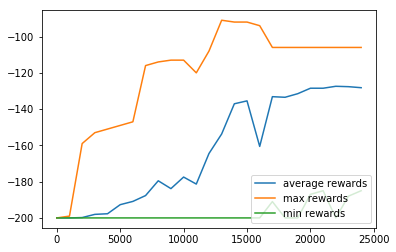

In [33]:
plt.plot(aggr_ep_rewards['ep'], aggr_ep_rewards['avg'], label="average rewards")
plt.plot(aggr_ep_rewards['ep'], aggr_ep_rewards['max'], label="max rewards")
plt.plot(aggr_ep_rewards['ep'], aggr_ep_rewards['min'], label="min rewards")
plt.legend(loc=4)
plt.show()

<h4>Making graphs from each q-table


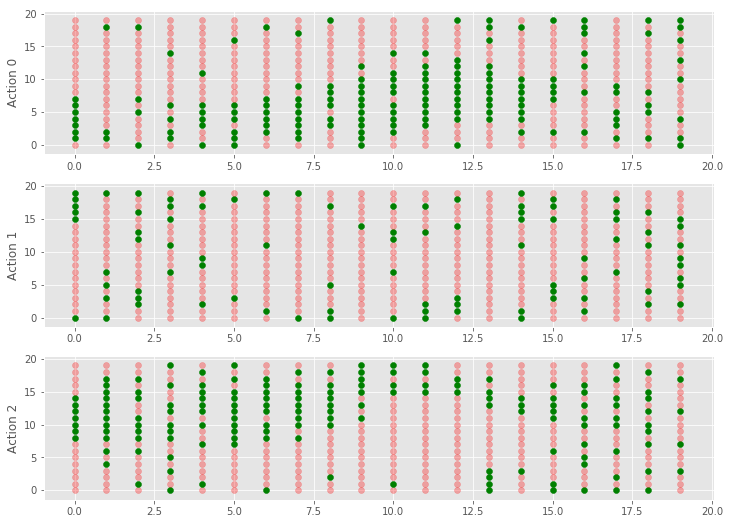

In [35]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np

style.use('ggplot')


def get_q_color(value, vals):
    if value == max(vals):
        return "green", 1.0
    else:
        return "red", 0.3


fig = plt.figure(figsize=(12, 9))

ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)

i = 24000
q_table = np.load(f"qtables/{i}-qtable.npy")


for x, x_vals in enumerate(q_table):
    for y, y_vals in enumerate(x_vals):
        ax1.scatter(x, y, c=get_q_color(y_vals[0], y_vals)[0], marker="o", alpha=get_q_color(y_vals[0], y_vals)[1])
        ax2.scatter(x, y, c=get_q_color(y_vals[1], y_vals)[0], marker="o", alpha=get_q_color(y_vals[1], y_vals)[1])
        ax3.scatter(x, y, c=get_q_color(y_vals[2], y_vals)[0], marker="o", alpha=get_q_color(y_vals[2], y_vals)[1])

        ax1.set_ylabel("Action 0")
        ax2.set_ylabel("Action 1")
        ax3.set_ylabel("Action 2")


plt.show()

In [38]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np

style.use('ggplot')


def get_q_color(value, vals):
    if value == max(vals):
        return "green", 1.0
    else:
        return "red", 0.3


fig = plt.figure(figsize=(12, 9))


for i in range(0, 25000, 500):
    print(i)
    ax1 = fig.add_subplot(311)
    ax2 = fig.add_subplot(312)
    ax3 = fig.add_subplot(313)

    q_table = np.load(f"qtables/{i}-qtable.npy")

    for x, x_vals in enumerate(q_table):
        for y, y_vals in enumerate(x_vals):
            ax1.scatter(x, y, c=get_q_color(y_vals[0], y_vals)[0], marker="o", alpha=get_q_color(y_vals[0], y_vals)[1])
            ax2.scatter(x, y, c=get_q_color(y_vals[1], y_vals)[0], marker="o", alpha=get_q_color(y_vals[1], y_vals)[1])
            ax3.scatter(x, y, c=get_q_color(y_vals[2], y_vals)[0], marker="o", alpha=get_q_color(y_vals[2], y_vals)[1])

            ax1.set_ylabel("Action 0")
            ax2.set_ylabel("Action 1")
            ax3.set_ylabel("Action 2")

    #plt.show()
    plt.savefig(f"qtable_charts/{i}.png")
    plt.clf()

0
500
1000
1500
2000
2500
3000
3500
4000
4500
5000
5500
6000
6500
7000
7500
8000
8500
9000
9500
10000
10500
11000
11500
12000
12500
13000
13500
14000
14500
15000
15500
16000
16500
17000
17500
18000
18500
19000
19500
20000
20500
21000
21500
22000
22500
23000
23500
24000
24500


<Figure size 864x648 with 0 Axes>

In [41]:
import cv2
import os


def make_video():
    # windows:
    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    # Linux:
    #fourcc = cv2.VideoWriter_fourcc('M','J','P','G')
    out = cv2.VideoWriter('qlearn.avi', fourcc, 60.0, (1200, 900))

    for i in range(0, 24000, 1000):
        img_path = f"qtable_charts/{i}.png"
        print(img_path)
        frame = cv2.imread(img_path)
        out.write(frame)

    out.release()


make_video()

qtable_charts/0.png
qtable_charts/1000.png
qtable_charts/2000.png
qtable_charts/3000.png
qtable_charts/4000.png
qtable_charts/5000.png
qtable_charts/6000.png
qtable_charts/7000.png
qtable_charts/8000.png
qtable_charts/9000.png
qtable_charts/10000.png
qtable_charts/11000.png
qtable_charts/12000.png
qtable_charts/13000.png
qtable_charts/14000.png
qtable_charts/15000.png
qtable_charts/16000.png
qtable_charts/17000.png
qtable_charts/18000.png
qtable_charts/19000.png
qtable_charts/20000.png
qtable_charts/21000.png
qtable_charts/22000.png
qtable_charts/23000.png
